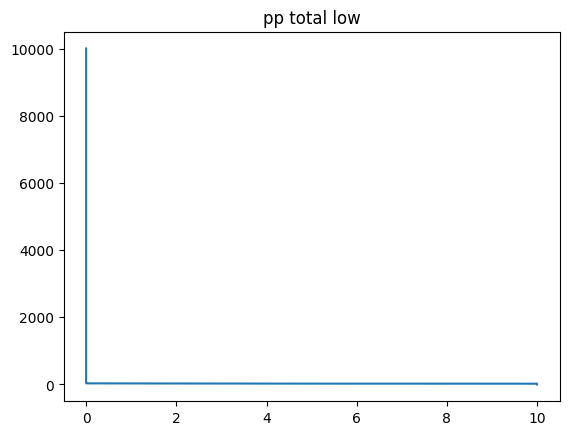

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data (assumes whitespace-separated columns)
data = np.loadtxt("pp_total_low.dat", usecols=(0, 1))

# If the file has two columns
x = data[:, 0]
y = data[:, 1]

plt.plot(x, y)
# plt.xlabel("X")
# plt.ylabel("Y")
plt.title("pp total low")
plt.show()



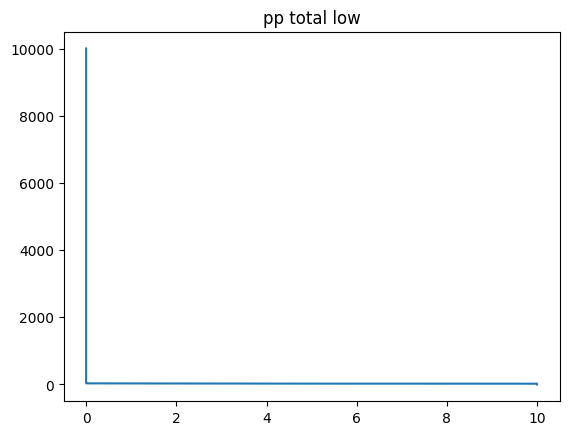

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data (assumes whitespace-separated columns)
data = np.loadtxt("ppbar_total_low.dat", usecols=(0, 1))

# If the file has two columns
x = data[:, 0]
y = data[:, 1]

plt.plot(x, y)
# plt.xlabel("X")
# plt.ylabel("Y")
plt.title("pp total low")
plt.show()



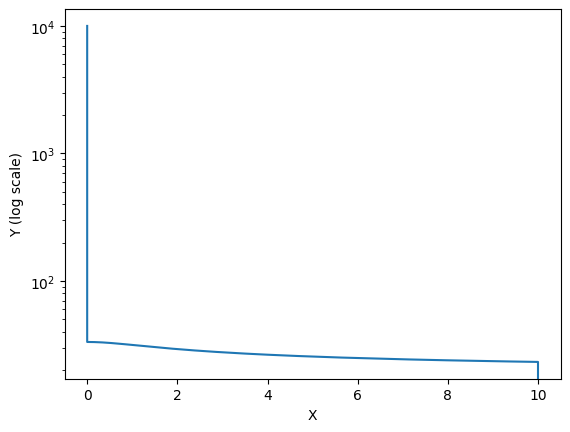

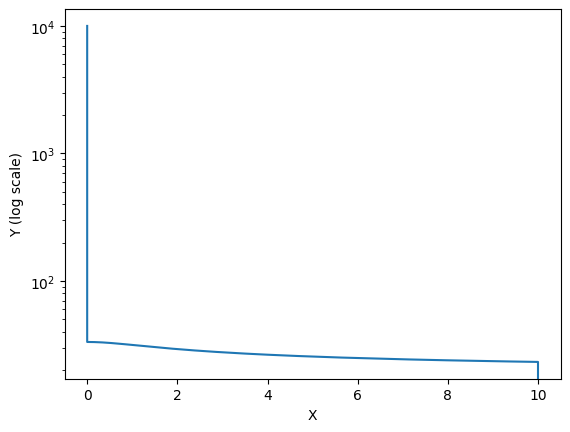

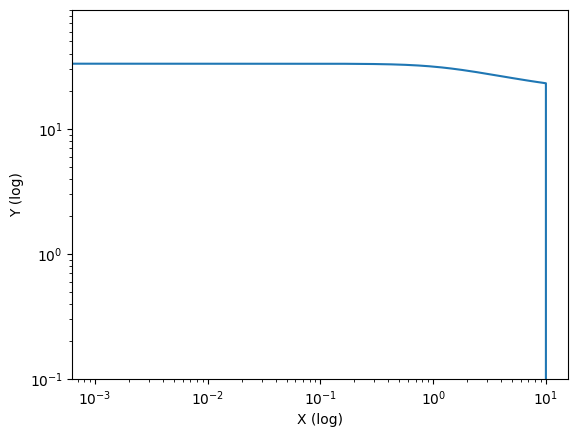

In [12]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("pn_total_low.dat", usecols=(0, 1))

x = data[:, 0]
y = data[:, 1]

plt.plot(x, y)
plt.yscale("log")
plt.xlabel("X")
plt.ylabel("Y (log scale)")
plt.show()

plt.semilogy(x, y)
plt.xlabel("X")
plt.ylabel("Y (log scale)")
plt.show()

plt.loglog(x, y)
plt.xlabel("X (log)")
plt.ylabel("Y (log)")
plt.ylim(0.1,90)
plt.show()


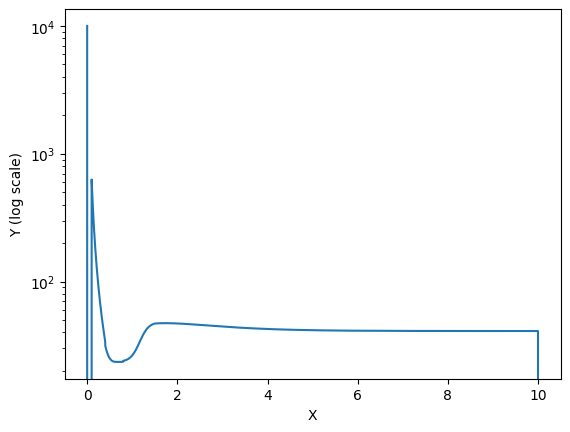

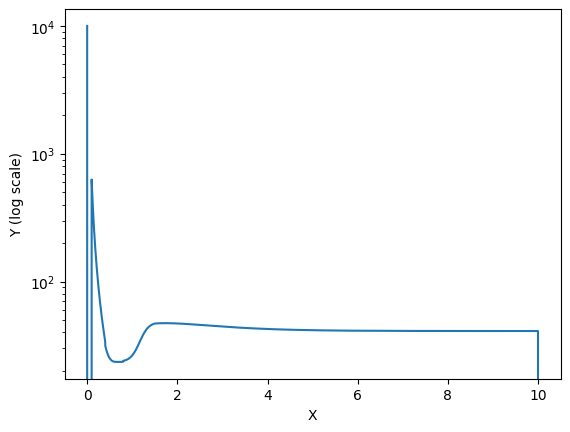

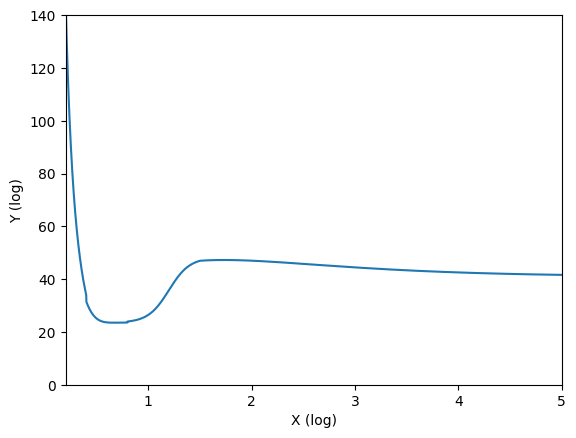

In [24]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("/home/ekremdemiray/code_software/sherpa/Examples/RemnantTests/SimpleLEP/XSecs/pp_total_low.dat", usecols=(0, 1))

x = data[:, 0]
y = data[:, 1]

plt.plot(x, y)
plt.yscale("log")
plt.xlabel("X")
plt.ylabel("Y (log scale)")
plt.show()

plt.semilogy(x, y)
plt.xlabel("X")
plt.ylabel("Y (log scale)")
plt.show()

plt.plot(x, y)
plt.xlabel("X (log)")
plt.ylabel("Y (log)")
plt.ylim(0,140)
plt.xlim(0.2,5)
plt.show()


<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_516202/2847705494.py:39: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Cross Section vs $\sqrt{s}$")


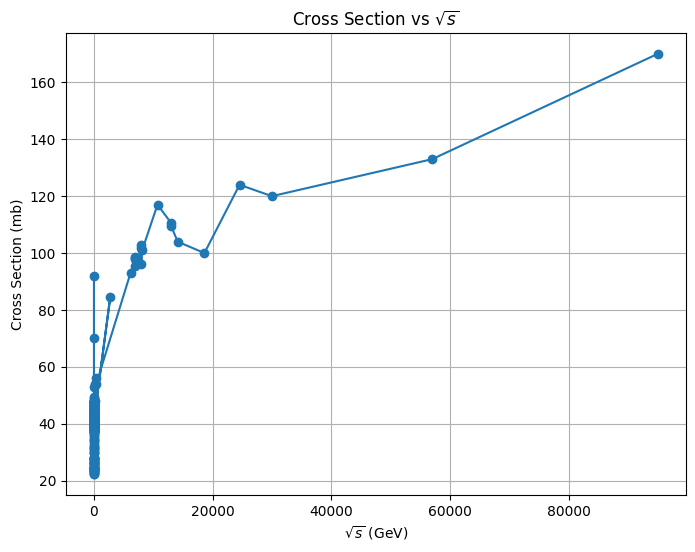

In [33]:
rows = []
with open("/home/ekremdemiray/ppDataFromPDG.dat") as f:
    for line in f.readlines()[13:]:    # skip header
        parts = line.split()
        if len(parts) < 9:
            continue
        numeric = parts[:9]
        reference_text = " ".join(parts[9:])
        rows.append(numeric + [reference_text])

import pandas as pd
df = pd.DataFrame(rows, columns=[
    "POINT","PLAB","PLAB_MIN","PLAB_MAX","SIG",
    "STA_ERRp","STA_ERRm","SY_ERRp","SY_ERRm",
    "REFERENCE"
])

df = df.astype({c: float for c in df.columns[:9]})

m_p = 0.938272  

# For p+p scattering in lab frame (target at rest):
# s = m^2 + m^2 + 2*m*E_lab
# E_lab = sqrt(p_lab^2 + m^2)

E_lab = np.sqrt(df["PLAB"]**2 + m_p**2)
s = m_p**2 * 2 + 2 * m_p * E_lab
sqrt_s = np.sqrt(s)

df["sqrt_s"] = sqrt_s

# ----------------------------------------------------
# 4. Plot cross section vs sqrt(s)
# ----------------------------------------------------
plt.figure(figsize=(8,6))
plt.plot(df["sqrt_s"], df["SIG"], marker='o')
plt.xlabel(r"$\sqrt{s}$ (GeV)")
plt.ylabel("Cross Section (mb)")
plt.title("Cross Section vs $\sqrt{s}$")
plt.grid(True)
plt.show()



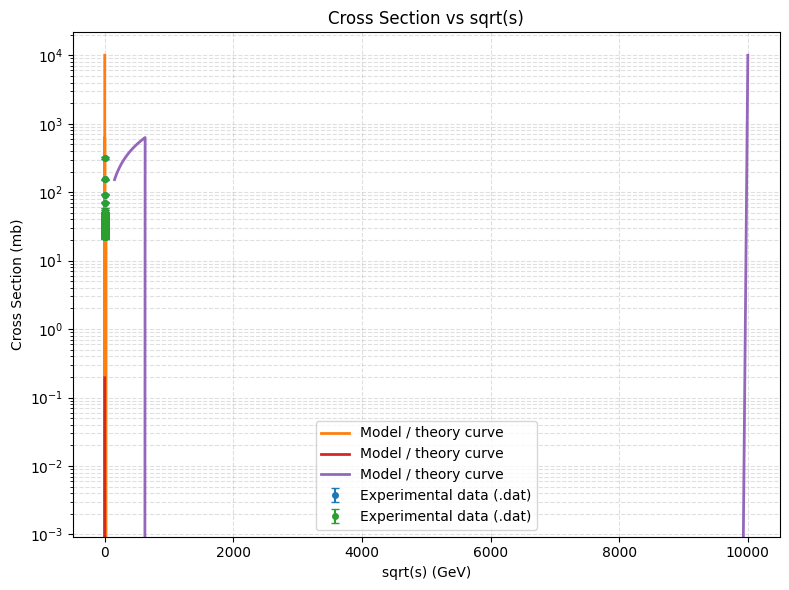

    POINT  PLAB    SIG  STA_ERRp  STA_ERRm    sqrt_s                       REF
0       1  0.14  314.0      13.0      13.0  1.881730  BARASHENKOV 61 FP 9, 549
1       2  0.19  155.0       2.0       2.0  1.886042  BARASHENKOV 61 FP 9, 549
2       3  0.24   92.0       1.0       1.0  1.891588  BARASHENKOV 61 FP 9, 549
3       4  0.28   70.0       1.0       1.0  1.896878  BARASHENKOV 61 FP 9, 549
4       5  0.31   52.8       6.0       6.0  1.901323  BARASHENKOV 61 FP 9, 549
5       6  0.35   42.5       0.4       0.4  1.907860  BARASHENKOV 61 FP 9, 549
6       7  0.37   37.4       2.3       2.3  1.911380  BARASHENKOV 61 FP 9, 549
7       8  0.39   33.9       2.0       2.0  1.915062  BARASHENKOV 61 FP 9, 549
8       9  0.43   28.5       1.3       1.3  1.922891  BARASHENKOV 61 FP 9, 549
9      10  0.44   27.7       1.3       1.3  1.924943  BARASHENKOV 61 FP 9, 549
10     11  0.49   24.8       0.8       0.8  1.935732  BARASHENKOV 61 FP 9, 549
11     12  0.54   25.2       1.2       1.2  1.947356

In [89]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fname = "/home/ekremdemiray/ppDataFromPDG.dat"  
m_p = 0.938272  

# regex to identify a line that starts with a point number followed by numbers (rough)
data_line_re = re.compile(r'^\s*\d+\s+[-+]?[0-9]*\.?[0-9]+')

# 1) Read file and locate first data line
with open(fname, 'r', encoding='utf-8', errors='ignore') as f:
    lines = f.readlines()

start_idx = None
for i, line in enumerate(lines):
    if data_line_re.match(line):
        # ensure there are at least N tokens on this line
        tokens = line.strip().split()
        if len(tokens) >= 9:
            start_idx = i
            break

if start_idx is None:
    raise RuntimeError("Could not find the data table start. Check file format or regex.")

rows = []
refs = []
for line in lines[start_idx:]:
    if not line.strip():  # skip empty lines
        continue
    toks = line.strip().split()
    if len(toks) < 9:
        # might be trailing notes; skip
        continue
    numeric_toks = toks[:9]
    ref_toks = toks[9:]
    rows.append(numeric_toks)
    refs.append(" ".join(ref_toks))

# 3) Build dataframe for numeric cols
col_names = [
    "POINT", "PLAB", "PLAB_MIN", "PLAB_MAX", "SIG",
    "STA_ERRp", "STA_ERRm", "SY_ERRp", "SY_ERRm"
]
df_num = pd.DataFrame(rows, columns=col_names)

# Convert numeric columns to floats (POINT may be integer but convert to float is fine)
for c in col_names:
    df_num[c] = pd.to_numeric(df_num[c], errors='coerce')

# add reference text column
df_num["REF"] = refs

# remove any rows that could not be parsed to numeric (NaNs in PLAB or SIG)
df_num = df_num.dropna(subset=["PLAB", "SIG"]).reset_index(drop=True)


# # 4) Compute sqrt(s) for p (beam) on p (target at rest)
# E_lab = np.sqrt(df_num["PLAB"]**2 + m_p**2)
# s = m_p**2 + m_p**2 + 2 * m_p * E_lab
# df_num["sqrt_s"] = np.sqrt(s)

# 1) Process entire dataframe
df_num["sqrt_s"] = np.sqrt(m_p**2 + m_p**2 + 2*m_p*np.sqrt(df_num["PLAB"]**2 + m_p**2))

# 2) Take first 175 rows safely
df_num = df_num.iloc[:175].copy()



# 5) Optional: combine systematic and statistical errors if you want,
# here we'll plot statistical asymmetric errorbars and show sym error as caps (if present)
y = df_num["SIG"].values
yerr_lower = df_num["STA_ERRm"].values  # STA_ERR- column
yerr_upper = df_num["STA_ERRp"].values  # STA_ERR+ column



# If any zerosg
yerr_lower = np.nan_to_num(yerr_lower, nan=0.0)
yerr_upper = np.nan_to_num(yerr_upper, nan=0.0)





# # 6) Plot with asymmetric errorbars
# plt.figure(figsize=(8,6))
# plt.errorbar(df_num["sqrt_s"], y,
#              yerr=[yerr_lower, yerr_upper],
#              fmt='o', markersize=5, elinewidth=1, capsize=3)
# plt.xlabel(r"$\sqrt{s}$ (GeV)")
# plt.yscale("log")
# plt.ylabel("Cross Section (mb)")
# plt.title("Cross Section vs $\\sqrt{s}$")
# plt.grid(alpha=0.3)
# plt.tight_layout()
# plt.savefig("cross_section_vs_sqrt_s.png", dpi=150)
# plt.show()

plt.figure(figsize=(8,6))

# -----------------------------------------------------------
# FIRST DATASET  (from your .DAT file)
# -----------------------------------------------------------
plt.errorbar(
    df_num["sqrt_s"],
    df_num["SIG"],
    yerr=[yerr_lower, yerr_upper],
    fmt='o',
    markersize=4,
    capsize=3,
    label="Experimental data (.dat)"
)

# -----------------------------------------------------------
# SECOND DATASET (from np.loadtxt)
# -----------------------------------------------------------
data2 = np.loadtxt(
    "/home/ekremdemiray/code_software/sherpa/Examples/RemnantTests/SimpleLEP/XSecs/pp_total_low.dat",
    usecols=(0, 1)
)

sqrt_s2 = data2[:, 0]
sig2    = data2[:, 1]

plt.plot(
    sqrt_s2,
    sig2,
    '-',
    linewidth=2,
    label="Model / theory curve"
)

# -----------------------------------------------------------
# Set log scale for the y-axis
# -----------------------------------------------------------
plt.yscale("log")

# Labels & title
plt.xlabel(r"sqrt{s} (GeV)")
plt.ylabel("Cross Section (mb)")
plt.title("Cross Section vs sqrt(s)")

plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.tight_layout()
# plt.xlim(0.1,20000)plt.figure(figsize=(8,6))

# -----------------------------------------------------------
# FIRST DATASET  (from your .DAT file)
# -----------------------------------------------------------
plt.errorbar(
    df_num["sqrt_s"],
    df_num["SIG"],
    yerr=[yerr_lower, yerr_upper],
    fmt='o',
    markersize=4,
    capsize=3,
    label="Experimental data (.dat)"
)

# -----------------------------------------------------------
# SECOND DATASET (from np.loadtxt)
# -----------------------------------------------------------
data2 = np.loadtxt(
    "/home/ekremdemiray/code_software/sherpa/Examples/RemnantTests/SimpleLEP/XSecs/pp_total_low.dat",
    usecols=(0, 1)
)

sqrt_s2 = data2[:, 0]
sqrt_s2 = data2[0:99]

sig2    = data2[:, 1]
sig2    = data2[:99]

plt.plot(
    sqrt_s2,
    sig2,
    '-',
    linewidth=2,
    label="Model / theory curve"
)

# -----------------------------------------------------------
# Set log scale for the y-axis
# -----------------------------------------------------------
plt.yscale("log")

# Labels & title
plt.xlabel(r"sqrt(s) (GeV)")
plt.ylabel("Cross Section (mb)")
plt.title("Cross Section vs sqrt(s)")

plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()
plt.show()

# 7) Show a small sample so you can inspect
print(df_num.loc[:, ["POINT", "PLAB", "SIG", "STA_ERRp", "STA_ERRm", "sqrt_s", "REF"]].head(12))


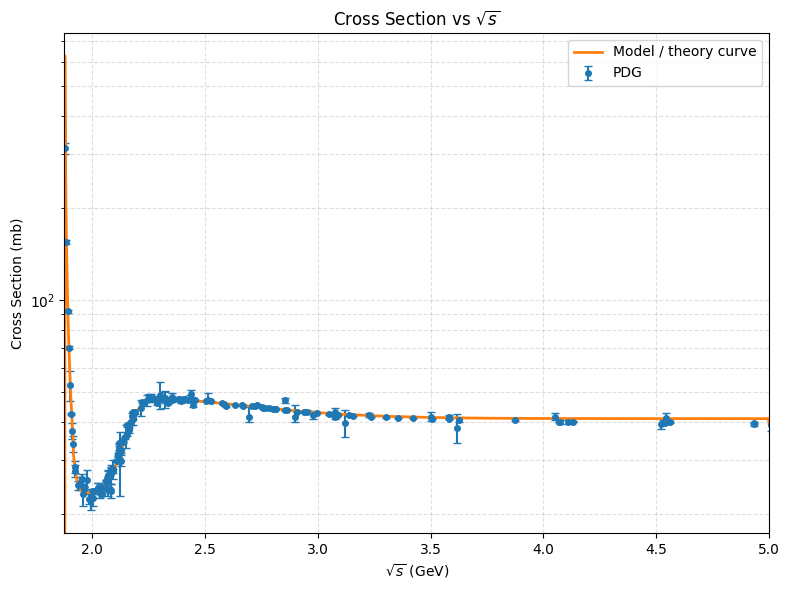

In [94]:
df_num = df_num.iloc[:175].copy()

E_lab = np.sqrt(df_num["PLAB"]**2 + m_p**2)
s = m_p**2 + m_p**2 + 2 * m_p * E_lab
df_num["sqrt_s"] = np.sqrt(s)

yerr_lower = np.nan_to_num(df_num["STA_ERRm"].values, nan=0.0)
yerr_upper = np.nan_to_num(df_num["STA_ERRp"].values, nan=0.0)

plt.figure(figsize=(8,6))

# Experimental data
plt.errorbar(
    df_num["sqrt_s"],
    df_num["SIG"],
    yerr=[yerr_lower, yerr_upper],
    fmt='o',
    markersize=4,
    capsize=3,
    label="PDG"
)

data = np.loadtxt("/home/ekremdemiray/code_software/sherpa/Examples/RemnantTests/SimpleLEP/XSecs/pp_total_low.dat", skiprows=1) 
p_lab = data[:, 0] 
sigma = data[:, 1]  

E_lab = np.sqrt(p_lab**2 + m_p**2)
s = m_p**2 + m_p**2 + 2*m_p*E_lab
sqrt_s = np.sqrt(s)


plt.plot(sqrt_s, sigma, '-', linewidth=2, label="Model / theory curve")

plt.yscale("log")
plt.xlim(min(sqrt_s),5)
plt.xlabel(r"$\sqrt{s}$ (GeV)")
plt.ylabel("Cross Section (mb)")
plt.title(r"Cross Section vs $\sqrt{s}$")
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.savefig("ppCrossSectionVsPDGData.png", dpi=150)
plt.show()


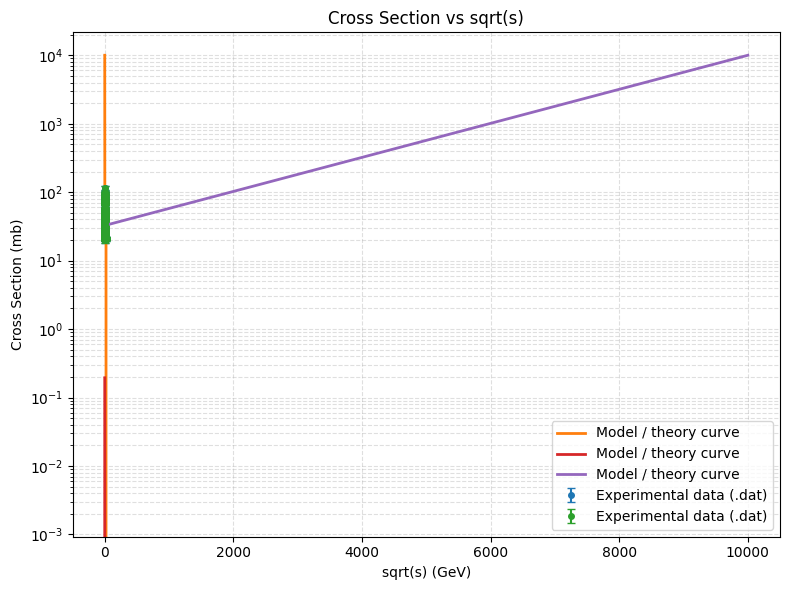

    POINT    PLAB    SIG  STA_ERRp  STA_ERRm    sqrt_s  \
0       1  0.2450  113.8       8.0       8.0  1.892208   
1       2  0.2550   98.0       5.3       5.3  1.893485   
2       3  0.2650   94.0       4.4       4.4  1.894807   
3       4  0.2750   96.7       4.2       4.2  1.896176   
4       5  0.2850   75.1       3.0       3.0  1.897591   
5       6  0.2929   89.3       4.6       4.6  1.898740   
6       7  0.2930   90.7       4.9       4.9  1.898755   
7       8  0.2950   82.5       3.5       3.5  1.899050   
8       9  0.3000   79.4       8.6       8.6  1.899797   
9      10  0.3050   78.6       3.5       3.5  1.900554   
10     11  0.3150   70.9       3.2       3.2  1.902102   
11     12  0.3250   76.0       3.1       3.1  1.903694   

                        REF  
0        MAST 76 PR D14, 13  
1        MAST 76 PR D14, 13  
2        MAST 76 PR D14, 13  
3        MAST 76 PR D14, 13  
4        MAST 76 PR D14, 13  
5   FERROLUZZI 62 PRL 8, 28  
6    WATSON 63 PR 131, 2248  
7    

In [111]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fname = "/home/ekremdemiray/PDGPKMinus.dat"  
m_p = 0.938272  

# regex to identify a line that starts with a point number followed by numbers (rough)
data_line_re = re.compile(r'^\s*\d+\s+[-+]?[0-9]*\.?[0-9]+')

# 1) Read file and locate first data line
with open(fname, 'r', encoding='utf-8', errors='ignore') as f:
    lines = f.readlines()

start_idx = None
for i, line in enumerate(lines):
    if data_line_re.match(line):
        # ensure there are at least N tokens on this line
        tokens = line.strip().split()
        if len(tokens) >= 9:
            start_idx = i
            break

if start_idx is None:
    raise RuntimeError("Could not find the data table start. Check file format or regex.")

rows = []
refs = []
for line in lines[start_idx:]:
    if not line.strip():  # skip empty lines
        continue
    toks = line.strip().split()
    if len(toks) < 9:
        # might be trailing notes; skip
        continue
    numeric_toks = toks[:9]
    ref_toks = toks[9:]
    rows.append(numeric_toks)
    refs.append(" ".join(ref_toks))

# 3) Build dataframe for numeric cols
col_names = [
    "POINT", "PLAB", "PLAB_MIN", "PLAB_MAX", "SIG",
    "STA_ERRp", "STA_ERRm", "SY_ERRp", "SY_ERRm"
]
df_num = pd.DataFrame(rows, columns=col_names)

# Convert numeric columns to floats (POINT may be integer but convert to float is fine)
for c in col_names:
    df_num[c] = pd.to_numeric(df_num[c], errors='coerce')

# add reference text column
df_num["REF"] = refs

# remove any rows that could not be parsed to numeric (NaNs in PLAB or SIG)
df_num = df_num.dropna(subset=["PLAB", "SIG"]).reset_index(drop=True)


# # 4) Compute sqrt(s) for p (beam) on p (target at rest)
# E_lab = np.sqrt(df_num["PLAB"]**2 + m_p**2)
# s = m_p**2 + m_p**2 + 2 * m_p * E_lab
# df_num["sqrt_s"] = np.sqrt(s)

# 1) Process entire dataframe
df_num["sqrt_s"] = np.sqrt(m_p**2 + m_p**2 + 2*m_p*np.sqrt(df_num["PLAB"]**2 + m_p**2))

# 2) Take first 175 rows safely
df_num = df_num.iloc[:700].copy()



# 5) Optional: combine systematic and statistical errors if you want,
# here we'll plot statistical asymmetric errorbars and show sym error as caps (if present)
y = df_num["SIG"].values
yerr_lower = df_num["STA_ERRm"].values  # STA_ERR- column
yerr_upper = df_num["STA_ERRp"].values  # STA_ERR+ column



# If any zerosg
yerr_lower = np.nan_to_num(yerr_lower, nan=0.0)
yerr_upper = np.nan_to_num(yerr_upper, nan=0.0)





# # 6) Plot with asymmetric errorbars
# plt.figure(figsize=(8,6))
# plt.errorbar(df_num["sqrt_s"], y,
#              yerr=[yerr_lower, yerr_upper],
#              fmt='o', markersize=5, elinewidth=1, capsize=3)
# plt.xlabel(r"$\sqrt{s}$ (GeV)")
# plt.yscale("log")
# plt.ylabel("Cross Section (mb)")
# plt.title("Cross Section vs $\\sqrt{s}$")
# plt.grid(alpha=0.3)
# plt.tight_layout()
# plt.savefig("cross_section_vs_sqrt_s.png", dpi=150)
# plt.show()

plt.figure(figsize=(8,6))

# -----------------------------------------------------------
# FIRST DATASET  (from your .DAT file)
# -----------------------------------------------------------
plt.errorbar(
    df_num["sqrt_s"],
    df_num["SIG"],
    yerr=[yerr_lower, yerr_upper],
    fmt='o',
    markersize=4,
    capsize=3,
    label="Experimental data (.dat)"
)

# -----------------------------------------------------------
# SECOND DATASET (from np.loadtxt)
# -----------------------------------------------------------
data2 = np.loadtxt(
    "/home/ekremdemiray/code_software/sherpa/Examples/RemnantTests/SimpleLEP/XSecs_BaryonMesonTest/pp_total_low.dat",
    usecols=(0, 1)
)

sqrt_s2 = data2[:, 0]
sig2    = data2[:, 1]

plt.plot(
    sqrt_s2,
    sig2,
    '-',
    linewidth=2,
    label="Model / theory curve"
)

# -----------------------------------------------------------
# Set log scale for the y-axis
# -----------------------------------------------------------
plt.yscale("log")

# Labels & title
plt.xlabel(r"sqrt{s} (GeV)")
plt.ylabel("Cross Section (mb)")
plt.title("Cross Section vs sqrt(s)")

plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.tight_layout()
# plt.xlim(0.1,20000)plt.figure(figsize=(8,6))

# -----------------------------------------------------------
# FIRST DATASET  (from your .DAT file)
# -----------------------------------------------------------
plt.errorbar(
    df_num["sqrt_s"],
    df_num["SIG"],
    yerr=[yerr_lower, yerr_upper],
    fmt='o',
    markersize=4,
    capsize=3,
    label="Experimental data (.dat)"
)

# -----------------------------------------------------------
# SECOND DATASET (from np.loadtxt)
# -----------------------------------------------------------
data2 = np.loadtxt(
    "/home/ekremdemiray/code_software/sherpa/Examples/RemnantTests/SimpleLEP/XSecs_BaryonMesonTest/pp_total_low.dat",
    usecols=(0, 1)
)

sqrt_s2 = data2[:, 0]
sqrt_s2 = data2[0:99]

sig2    = data2[:, 1]
sig2    = data2[:99]

plt.plot(
    sqrt_s2,
    sig2,
    '-',
    linewidth=2,
    label="Model / theory curve"
)

# -----------------------------------------------------------
# Set log scale for the y-axis
# -----------------------------------------------------------
plt.yscale("log")

# Labels & title
plt.xlabel(r"sqrt(s) (GeV)")
plt.ylabel("Cross Section (mb)")
plt.title("Cross Section vs sqrt(s)")

plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()
plt.show()

# 7) Show a small sample so you can inspect
print(df_num.loc[:, ["POINT", "PLAB", "SIG", "STA_ERRp", "STA_ERRm", "sqrt_s", "REF"]].head(12))


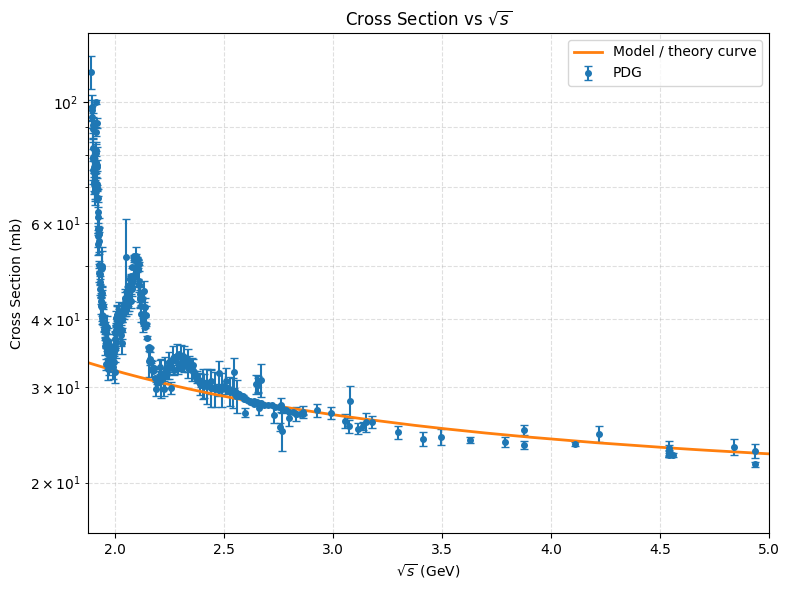

In [109]:
df_num = df_num.iloc[:400].copy()

E_lab = np.sqrt(df_num["PLAB"]**2 + m_p**2)
s = m_p**2 + m_p**2 + 2 * m_p * E_lab
df_num["sqrt_s"] = np.sqrt(s)

yerr_lower = np.nan_to_num(df_num["STA_ERRm"].values, nan=0.0)
yerr_upper = np.nan_to_num(df_num["STA_ERRp"].values, nan=0.0)

plt.figure(figsize=(8,6))

# Experimental data
plt.errorbar(
    df_num["sqrt_s"],
    df_num["SIG"],
    yerr=[yerr_lower, yerr_upper],
    fmt='o',
    markersize=4,
    capsize=3,
    label="PDG"
)

data = np.loadtxt("/home/ekremdemiray/code_software/sherpa/Examples/RemnantTests/SimpleLEP/XSecs_BaryonMesonTest/pp_total_low.dat", skiprows=1) 
p_lab = data[:, 0] 
sigma = data[:, 1]  

E_lab = np.sqrt(p_lab**2 + m_p**2)
s = m_p**2 + m_p**2 + 2*m_p*E_lab
sqrt_s = np.sqrt(s)


plt.plot(sqrt_s, sigma, '-', linewidth=2, label="Model / theory curve")

plt.yscale("log")
plt.xlim(min(sqrt_s),5)
plt.xlabel(r"$\sqrt{s}$ (GeV)")
plt.ylabel("Cross Section (mb)")
plt.title(r"Cross Section vs $\sqrt{s}$")
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.savefig("PKMinusTotalScattering.png", dpi=150)
plt.show()


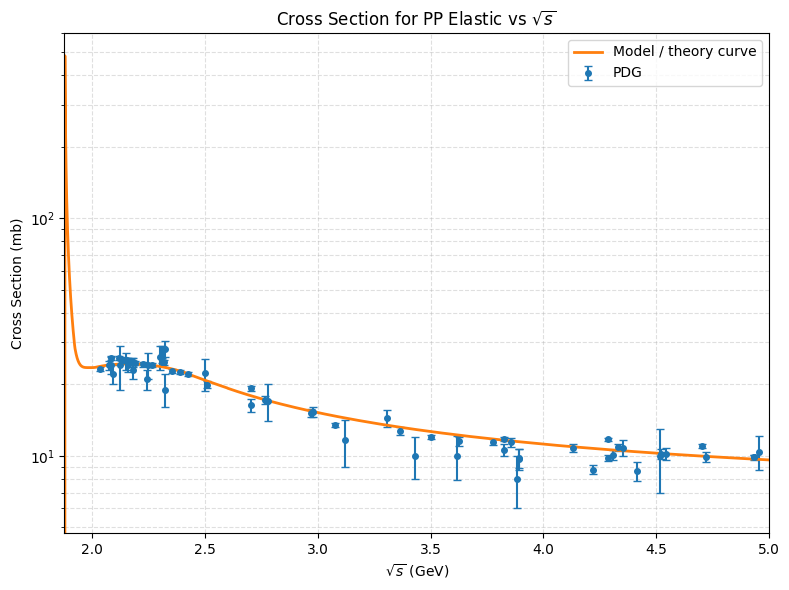

    POINT     PLAB   SIG  STA_ERRp  STA_ERRm    sqrt_s  \
0       1  0.84600  23.2       0.5       0.5  2.032598   
1       2  0.97935  24.0       1.0       1.0  2.075046   
2       3  1.00000  25.8       0.5       0.5  2.081811   
3       4  1.00959  24.0       2.0       2.0  2.084968   
4       5  1.03673  22.0       2.0       2.0  2.093950   
5       6  1.11100  25.8       0.5       0.5  2.118859   
6       7  1.12700  24.0       5.0       5.0  2.124281   
7       8  1.16810  25.2       0.8       0.8  2.138288   
8       9  1.20634  25.0       2.0       2.0  2.151412   
9      10  1.21500  25.3       0.5       0.5  2.154396   
10     11  1.23200  24.2       1.6       1.6  2.160263   
11     12  1.28140  25.1       0.8       0.8  2.177387   

                             REF  
0       SHIMIZU 82B NP A386, 571  
1          FOCARDI 65 NC 39, 405  
2       SHIMIZU 82B NP A386, 571  
3           SMITH 55 PR 97, 1186  
4     MESHCHERYAKO 56 NCS 3, 119  
5       SHIMIZU 82B NP A386, 571  


In [118]:
###Proton-Proton Elastic


import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fname = "/home/ekremdemiray/ppElastic.dat"  
m_p = 0.938272  

# regex to identify a line that starts with a point number followed by numbers (rough)
data_line_re = re.compile(r'^\s*\d+\s+[-+]?[0-9]*\.?[0-9]+')

# 1) Read file and locate first data line
with open(fname, 'r', encoding='utf-8', errors='ignore') as f:
    lines = f.readlines()

start_idx = None
for i, line in enumerate(lines):
    if data_line_re.match(line):
        # ensure there are at least N tokens on this line
        tokens = line.strip().split()
        if len(tokens) >= 9:
            start_idx = i
            break

if start_idx is None:
    raise RuntimeError("Could not find the data table start. Check file format or regex.")

rows = []
refs = []
for line in lines[start_idx:]:
    if not line.strip():  # skip empty lines
        continue
    toks = line.strip().split()
    if len(toks) < 9:
        # might be trailing notes; skip
        continue
    numeric_toks = toks[:9]
    ref_toks = toks[9:]
    rows.append(numeric_toks)
    refs.append(" ".join(ref_toks))

# 3) Build dataframe for numeric cols
col_names = [
    "POINT", "PLAB", "PLAB_MIN", "PLAB_MAX", "SIG",
    "STA_ERRp", "STA_ERRm", "SY_ERRp", "SY_ERRm"
]
df_num = pd.DataFrame(rows, columns=col_names)

# Convert numeric columns to floats (POINT may be integer but convert to float is fine)
for c in col_names:
    df_num[c] = pd.to_numeric(df_num[c], errors='coerce')

# add reference text column
df_num["REF"] = refs

# remove any rows that could not be parsed to numeric (NaNs in PLAB or SIG)
df_num = df_num.dropna(subset=["PLAB", "SIG"]).reset_index(drop=True)


# # 4) Compute sqrt(s) for p (beam) on p (target at rest)
# E_lab = np.sqrt(df_num["PLAB"]**2 + m_p**2)
# s = m_p**2 + m_p**2 + 2 * m_p * E_lab
# df_num["sqrt_s"] = np.sqrt(s)

# 1) Process entire dataframe
df_num["sqrt_s"] = np.sqrt(m_p**2 + m_p**2 + 2*m_p*np.sqrt(df_num["PLAB"]**2 + m_p**2))




# If any zerosg
yerr_lower = np.nan_to_num(yerr_lower, nan=0.0)
yerr_upper = np.nan_to_num(yerr_upper, nan=0.0)

df_num = df_num.iloc[:400].copy()

E_lab = np.sqrt(df_num["PLAB"]**2 + m_p**2)
s = m_p**2 + m_p**2 + 2 * m_p * E_lab
df_num["sqrt_s"] = np.sqrt(s)

yerr_lower = np.nan_to_num(df_num["STA_ERRm"].values, nan=0.0)
yerr_upper = np.nan_to_num(df_num["STA_ERRp"].values, nan=0.0)

plt.figure(figsize=(8,6))

# Experimental data
plt.errorbar(
    df_num["sqrt_s"],
    df_num["SIG"],
    yerr=[yerr_lower, yerr_upper],
    fmt='o',
    markersize=4,
    capsize=3,
    label="PDG"
)
data = np.loadtxt("/home/ekremdemiray/code_software/sherpa/Examples/RemnantTests/SimpleLEP/XSecs/pp_elastic_low.dat", skiprows=1) 
p_lab = data[:, 0] 
sigma = data[:, 1]  

E_lab = np.sqrt(p_lab**2 + m_p**2)
s = m_p**2 + m_p**2 + 2*m_p*E_lab
sqrt_s = np.sqrt(s)


plt.plot(sqrt_s, sigma, '-', linewidth=2, label="Model / theory curve")

plt.yscale("log")
plt.xlim(min(sqrt_s),5)
plt.xlabel(r"$\sqrt{s}$ (GeV)")
plt.ylabel("Cross Section (mb)")
plt.title(r"Cross Section for PP Elastic vs $\sqrt{s}$")
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.savefig("ppElastic.png", dpi=150)
plt.show()


# 7) Show a small sample so you can inspect
print(df_num.loc[:, ["POINT", "PLAB", "SIG", "STA_ERRp", "STA_ERRm", "sqrt_s", "REF"]].head(12))


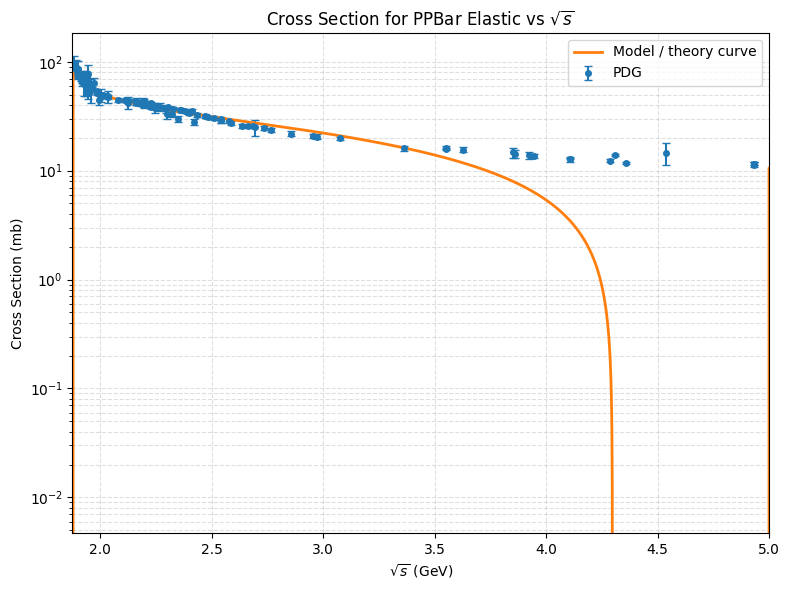

    POINT     PLAB   SIG  STA_ERRp  STA_ERRm    sqrt_s  \
0       1  0.15367  93.7      20.0      20.0  1.882784   
1       2  0.23916  89.0      15.0      15.0  1.891485   
2       3  0.29406  80.0      10.0      10.0  1.898911   
3       4  0.30600  74.7       1.9       1.9  1.900707   
4       5  0.31037  86.5      16.0      16.0  1.901380   
5       6  0.33600  75.7       1.9       1.9  1.905494   
6       7  0.34870  77.6       3.3       3.3  1.907637   
7       8  0.36000  73.1       1.8       1.8  1.909599   
8       9  0.38100  71.1       1.7       1.7  1.913385   
9      10  0.39900  68.0       1.7       1.7  1.916770   
10     11  0.40455  71.1       2.8       2.8  1.917839   
11     12  0.41600  65.5       1.6       1.6  1.920082   

                         REF  
0      HOSSAIN 65 NC 38, 737  
1      HOSSAIN 65 NC 38, 737  
2         CORK 62 NC 25, 497  
3   CHALOUPKA 76 PL 61B, 487  
4      HOSSAIN 65 NC 38, 737  
5   CHALOUPKA 76 PL 61B, 487  
6    CONFORTO 68 NC A54, 441

In [126]:
###Proton-Proton Bar Total

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fname = "/home/ekremdemiray/ppBarElastic.dat"  
m_p = 0.938272  

# regex to identify a line that starts with a point number followed by numbers (rough)
data_line_re = re.compile(r'^\s*\d+\s+[-+]?[0-9]*\.?[0-9]+')

# 1) Read file and locate first data line
with open(fname, 'r', encoding='utf-8', errors='ignore') as f:
    lines = f.readlines()

start_idx = None
for i, line in enumerate(lines):
    if data_line_re.match(line):
        # ensure there are at least N tokens on this line
        tokens = line.strip().split()
        if len(tokens) >= 9:
            start_idx = i
            break

if start_idx is None:
    raise RuntimeError("Could not find the data table start. Check file format or regex.")

rows = []
refs = []
for line in lines[start_idx:]:
    if not line.strip():  # skip empty lines
        continue
    toks = line.strip().split()
    if len(toks) < 9:
        # might be trailing notes; skip
        continue
    numeric_toks = toks[:9]
    ref_toks = toks[9:]
    rows.append(numeric_toks)
    refs.append(" ".join(ref_toks))

# 3) Build dataframe for numeric cols
col_names = [
    "POINT", "PLAB", "PLAB_MIN", "PLAB_MAX", "SIG",
    "STA_ERRp", "STA_ERRm", "SY_ERRp", "SY_ERRm"
]
df_num = pd.DataFrame(rows, columns=col_names)

# Convert numeric columns to floats (POINT may be integer but convert to float is fine)
for c in col_names:
    df_num[c] = pd.to_numeric(df_num[c], errors='coerce')

# add reference text column
df_num["REF"] = refs

# remove any rows that could not be parsed to numeric (NaNs in PLAB or SIG)
df_num = df_num.dropna(subset=["PLAB", "SIG"]).reset_index(drop=True)



df_num["sqrt_s"] = np.sqrt(m_p**2 + m_p**2 + 2*m_p*np.sqrt(df_num["PLAB"]**2 + m_p**2))


# If any zerosg
yerr_lower = np.nan_to_num(yerr_lower, nan=0.0)
yerr_upper = np.nan_to_num(yerr_upper, nan=0.0)

#df_num = df_num.iloc[:400].copy()

E_lab = np.sqrt(df_num["PLAB"]**2 + m_p**2)
s = m_p**2 + m_p**2 + 2 * m_p * E_lab
df_num["sqrt_s"] = np.sqrt(s)

yerr_lower = np.nan_to_num(df_num["STA_ERRm"].values, nan=0.0)
yerr_upper = np.nan_to_num(df_num["STA_ERRp"].values, nan=0.0)

plt.figure(figsize=(8,6))

# Experimental data
plt.errorbar(
    df_num["sqrt_s"],
    df_num["SIG"],
    yerr=[yerr_lower, yerr_upper],
    fmt='o',
    markersize=4,
    capsize=3,
    label="PDG"
)
data = np.loadtxt("/home/ekremdemiray/code_software/sherpa/Examples/RemnantTests/SimpleLEP/XSecs/ppbar_elastic_low.dat", skiprows=1) 
p_lab = data[:, 0] 
sigma = data[:, 1]  

E_lab = np.sqrt(p_lab**2 + m_p**2)
s = m_p**2 + m_p**2 + 2*m_p*E_lab
sqrt_s = np.sqrt(s)


plt.plot(sqrt_s, sigma, '-', linewidth=2, label="Model / theory curve")

plt.yscale("log")
plt.xlim(min(sqrt_s),5)
plt.xlabel(r"$\sqrt{s}$ (GeV)")
plt.ylabel("Cross Section (mb)")
plt.title(r"Cross Section for PPBar Elastic vs $\sqrt{s}$")
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.savefig("ppBarElastic.png", dpi=150)
plt.show()


# 7) Show a small sample so you can inspect
print(df_num.loc[:, ["POINT", "PLAB", "SIG", "STA_ERRp", "STA_ERRm", "sqrt_s", "REF"]].head(12))


In [122]:
df_num

,POINT,PLAB,PLAB_MIN,PLAB_MAX,SIG,STA_ERRp,STA_ERRm,SY_ERRp,SY_ERRm,REF,sqrt_s
0,1,0.00385,0.00123,0.00531,20360.000,100.000,100.000,0.0,0.0,"MELKONIAN 49 PR 76, 1744",1.876548
1,2,0.03043,0.03043,0.03043,6202.000,11.200,11.200,0.0,0.0,"ENGELKE 63 PR 129, 324",1.876791
2,3,0.03873,0.03873,0.03873,4700.000,40.000,40.000,0.0,0.0,"LAMPI 49 PR 76, 188 P",1.876943
3,4,0.04347,0.04347,0.04347,4228.000,18.000,18.000,0.0,0.0,"FIELDS 54 PR 94, 389",1.877047
4,5,0.04502,0.04502,0.04502,4060.000,30.000,30.000,0.0,0.0,"LAMPI 49 PR 76, 188 P",1.877084
...,...,...,...,...,...,...,...,...,...,...,...
395,396,0.48979,0.48327,0.49625,61.820,0.324,0.324,1.0,1.0,"LISOWSKI 82B PRL 49, 255",1.935685
396,397,0.49625,0.48979,0.50264,60.388,0.320,0.320,1.0,1.0,"LISOWSKI 82B PRL 49, 255",1.937141
397,398,0.50264,0.49839,0.50687,56.900,1.800,1.800,0.0,0.0,"TAYLOR 53 PM 44, 95 W",1.938595
398,399,0.50264,0.49625,0.50897,59.424,0.317,0.317,1.0,1.0,"LISOWSKI 82B PRL 49, 255",1.938595


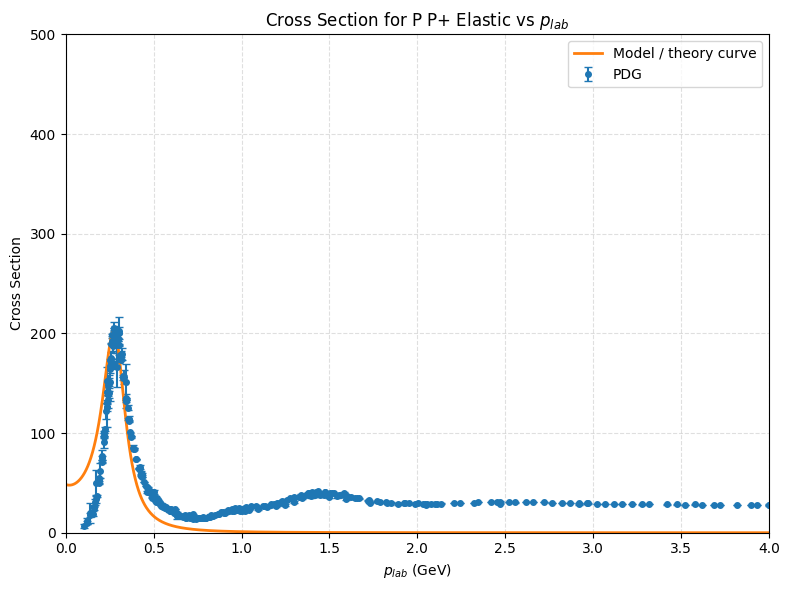

    POINT     PLAB    SIG  STA_ERRp  STA_ERRm    sqrt_s  \
0       1  0.10149   6.40      2.10      2.10  1.879278   
1       2  0.11924   9.80      1.50      1.50  1.880313   
2       3  0.12077  12.00      3.00      3.00  1.880410   
3       4  0.13700  20.00     10.00     10.00  1.881512   
4       5  0.13700  17.60      2.20      2.20  1.881512   
5       6  0.15633  19.00      2.60      2.60  1.883000   
6       7  0.15840  26.09      0.52      0.52  1.883171   
7       8  0.16000  25.30      2.20      2.20  1.883304   
8       9  0.16690  31.00      3.00      3.00  1.883894   
9      10  0.17209  50.00     13.00     13.00  1.884353   
10     11  0.17337  34.00      4.00      4.00  1.884469   
11     12  0.17600  37.30      1.00      1.00  1.884708   

                        REF  
0     LEONARD 54 PR 93, 568  
1     LEONARD 54 PR 93, 568  
2       OREAR 54 PR 93, 575  
3    ANDERSON 52 PR 85, 936  
4     LEONARD 54 PR 93, 568  
5     LEONARD 54 PR 93, 568  
6     CARTER 71 NP B26

In [277]:
###Proton-Proton Elastic


import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fname = "/home/ekremdemiray/pPiPlusTotalScattering.dat"  
m_p = 0.938272  

# regex to identify a line that starts with a point number followed by numbers (rough)
data_line_re = re.compile(r'^\s*\d+\s+[-+]?[0-9]*\.?[0-9]+')

# 1) Read file and locate first data line
with open(fname, 'r', encoding='utf-8', errors='ignore') as f:
    lines = f.readlines()

start_idx = None
for i, line in enumerate(lines):
    if data_line_re.match(line):
        # ensure there are at least N tokens on this line
        tokens = line.strip().split()
        if len(tokens) >= 9:
            start_idx = i
            break

if start_idx is None:
    raise RuntimeError("Could not find the data table start. Check file format or regex.")

rows = []
refs = []
for line in lines[start_idx:]:
    if not line.strip():  # skip empty lines
        continue
    toks = line.strip().split()
    if len(toks) < 9:
        # might be trailing notes; skip
        continue
    numeric_toks = toks[:9]
    ref_toks = toks[9:]
    rows.append(numeric_toks)
    refs.append(" ".join(ref_toks))

# 3) Build dataframe for numeric cols
col_names = [
    "POINT", "PLAB", "PLAB_MIN", "PLAB_MAX", "SIG",
    "STA_ERRp", "STA_ERRm", "SY_ERRp", "SY_ERRm"
]
df_num = pd.DataFrame(rows, columns=col_names)

# Convert numeric columns to floats (POINT may be integer but convert to float is fine)
for c in col_names:
    df_num[c] = pd.to_numeric(df_num[c], errors='coerce')

# add reference text column
df_num["REF"] = refs

# remove any rows that could not be parsed to numeric (NaNs in PLAB or SIG)
df_num = df_num.dropna(subset=["PLAB", "SIG"]).reset_index(drop=True)


# # 4) Compute sqrt(s) for p (beam) on p (target at rest)
# E_lab = np.sqrt(df_num["PLAB"]**2 + m_p**2)
# s = m_p**2 + m_p**2 + 2 * m_p * E_lab
# df_num["sqrt_s"] = np.sqrt(s)

# 1) Process entire dataframe
df_num["sqrt_s"] = np.sqrt(m_p**2 + m_p**2 + 2*m_p*np.sqrt(df_num["PLAB"]**2 + m_p**2))




# If any zerosg
yerr_lower = np.nan_to_num(yerr_lower, nan=0.0)
yerr_upper = np.nan_to_num(yerr_upper, nan=0.0)

df_num = df_num.iloc[:400].copy()

E_lab = np.sqrt(df_num["PLAB"]**2 + m_p**2)
s = m_p**2 + m_p**2 + 2 * m_p * E_lab
df_num["sqrt_s"] = np.sqrt(s)

yerr_lower = np.nan_to_num(df_num["STA_ERRm"].values, nan=0.0)
yerr_upper = np.nan_to_num(df_num["STA_ERRp"].values, nan=0.0)

plt.figure(figsize=(8,6))

# Experimental data
plt.errorbar(
    df_num["PLAB"],
    df_num["SIG"],
    yerr=[yerr_lower, yerr_upper],
    fmt='o',
    markersize=4,
    capsize=3,
    label="PDG"
)
data = np.loadtxt("/home/ekremdemiray/code_software/sherpa/Examples/RemnantTests/SimpleLEP/XSecs_BaryonMesonTest/pPi_total.dat", skiprows=1) 
p_lab = data[:, 0] 
sigma = data[:, 1]  

m_pion = 0.13957

E_lab = np.sqrt(p_lab**2 + m_pion**2)   # pion mass
s = m_pion**2 + m_p**2 + 2*m_p*E_lab

# E_lab = np.sqrt(p_lab**2 + m_p**2)
# s = m_pion**2 + m_p**2 + 2*m_p*E_lab
sqrt_s = np.sqrt(s)



plt.plot(p_lab, sigma, '-', linewidth=2, label="Model / theory curve")

# plt.yscale("log")
plt.xlim(0,4)
plt.ylim(0,500)
plt.xlabel(r"$p_{lab}$ (GeV)")
plt.ylabel("Cross Section")
plt.title(r"Cross Section for Proton - Pion+ Elastic vs $p_{lab}$")
plt.grid(True, which='both', ls='--', alpha=0.4)
plt.legend()
plt.tight_layout()
# plt.savefig("ProtonPionTotalScattering.png", dpi=150)
plt.show()


# 7) Show a small sample so you can inspect
print(df_num.loc[:, ["POINT", "PLAB", "SIG", "STA_ERRp", "STA_ERRm", "sqrt_s", "REF"]].head(12))


In [257]:
sqrt_s

array([1.077842  , 1.07787006, 1.07795421, ..., 7.56210977, 7.56248199,
       7.56285418], shape=(10001,))

In [263]:
sigma

array([1.85433e+05, 4.64106e+04, 2.06657e+04, ..., 2.37189e+01,
       0.00000e+00, 0.00000e+00], shape=(10001,))

In [264]:
sigma

array([1.85433e+05, 4.64106e+04, 2.06657e+04, ..., 2.37189e+01,
       0.00000e+00, 0.00000e+00], shape=(10001,))

In [258]:
p_lab

array([0.0000e+00, 3.0000e-03, 6.0000e-03, ..., 2.9994e+01, 2.9997e+01,
       3.0000e+01], shape=(10001,))